<a href="https://colab.research.google.com/github/jucardozo/Clasificador-de-Ropa/blob/main/TpCompeticion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import cv2
import albumentations as A

In [2]:
#TODO
# Hacer data aumentations ,k folding , probar , buscar formas de mejorar.
#Curva roc y cambiar de modelo.


In [3]:
#sentencias de importacion de input-output y google colab files
import io
from google.colab import files

uploaded = files.upload()
data_trainDF = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
data_train = data_trainDF.values
# El filename es el nombre del archivo.

from google.colab import drive
drive.mount("/content/drive/")

Saving train_labels.csv to train_labels.csv
Mounted at /content/drive/


In [4]:
data_train.shape
data_train=data_train.reshape(60000)
data_train.shape
print(type(data_train))



<class 'numpy.ndarray'>


In [11]:
#Descargar set de datos de Fashion MNIST //despues ver como poner los del profe

#datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)(con datos directos de fashion Mnist)
imagenes=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/train_images.npy')
x_test=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/test_images.npy')
#Imprimir los metadatos para ver que trae el set


#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
#datos_entrenamiento = datos_entrenamiento.map(normalizar)
new_imagen = list(imagenes[:60000])
new_labels=list(data_train[:60000])

def gen_imagen_FLIP(imagenes,etiquetas):
  for i in range(len(imagenes)):
    transform = A.HorizontalFlip(p=0.5)
    random.seed(7)
    new_imagen.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
def gen_imagen_ROTATE(imagenes,etiquetas):   
  for i in range(len(imagenes)):
    transform = A.RandomRotate90(p=0.5)
    random.seed(7)
    new_imagen.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1

gen_imagen_FLIP(imagenes,list(data_train))
gen_imagen_ROTATE(imagenes,list(data_train))
new_imagen=np.array(new_imagen)
normalizar(new_imagen) ## no se xq se rompe




#transform = A.ShiftScaleRotate(p=0.5)
#random.seed(7) 
#augmented_image = transform(image=imagenes[0])['image']
#new_imagen.append(augmented_image)
#plt.imshow(augmented_image)

#print(len(new_imagen))
#new_iman=np.array(new_imagen)
#print(type(new_iman))

#plt.imshow(new_iman[60000])
#print(len(imagenes+augmented_image))

#transform = A.RandomRotate90()
#random.seed(7) 
#augmented_image = transform(image=imagenes[0])['image']
#plt.imshow(augmented_image)



In [ ]:
#Data aumentations. 

print((new_labels[60001]))

print(type(new_imagen))
print(len(imagenes))
print(len(new_imagen))
new_imagen[0]

0
<class 'numpy.ndarray'>
60000
180000


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

0


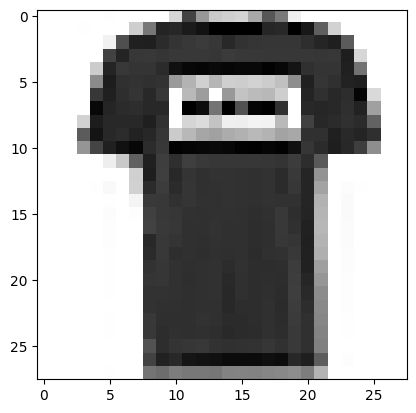

In [ ]:
print(data_train[1]) #dato crudo
plt.imshow(imagenes[1],cmap=plt.cm.binary)

180000
180000
0


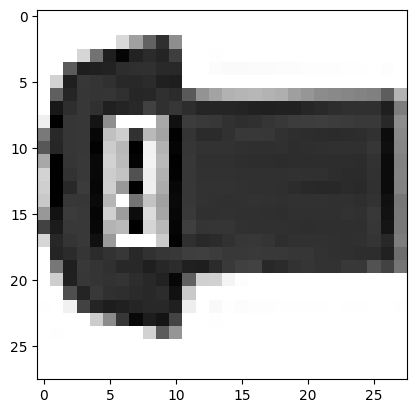

In [ ]:
#Chusmeo el dato, Normalizado
print(len(new_labels))
print(len(new_imagen))
print(new_labels[120001])
plt.imshow(new_imagen[120001],cmap=plt.cm.binary)

In [ ]:
#hacer algo pa mostrar todo

In [10]:
y_sparse_train = np.zeros([len(new_imagen),10])
y_sparse_test = np.zeros([10000,10])
for idx in range(len(new_imagen)):
    y_sparse_train[idx,new_labels[idx]] = 1

##for idx in range(10000):
 #3   y_sparse_test[idx,test_y[idx]] = 1

NameError: ignored

In [ ]:
y_sparse_trainO = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])
for idx in range(60000):
    y_sparse_trainO[idx,data_train[idx]] = 1

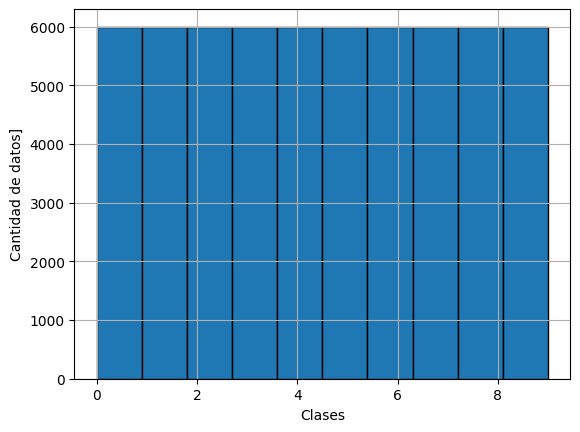

In [16]:
plt.hist(data_train,edgecolor='black')
plt.xlabel("Clases")
plt.ylabel("Cantidad de datos]")
plt.grid()

In [7]:
#Creo el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
   tf.keras.layers.Dense(75, activation=tf.nn.relu),
  tf.keras.layers.Dense(75, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [17]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['F1_score']
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 75)                5700      
                                                                 
 dense_3 (Dense)             (None, 10)                760       
                                                                 
Total params: 92,535
Trainable params: 92,535
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Entrenar
historial = modelo.fit(x = new_imagen, y = y_sparse_train,batch_size = 128, epochs=25)
#Baje batch size =>  0.8597(32,epochs=10)
#=> (32,15)=>0.8707

Epoch 1/25
1407/1407 [==============================] - 11s 7ms/step - loss: 1.5335 - accuracy: 0.7159
Epoch 2/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5491 - accuracy: 0.8080
Epoch 3/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4805 - accuracy: 0.8294
Epoch 4/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.4509 - accuracy: 0.8382
Epoch 5/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4258 - accuracy: 0.8474
Epoch 6/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4084 - accuracy: 0.8534
Epoch 7/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3925 - accuracy: 0.8577
Epoch 8/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3795 - accuracy: 0.8620
Epoch 9/25
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3652 - accuracy: 0.8666
Epoch 10/25
1407/1407 [==============================] - 11s 8ms/step - los

In [12]:
y_test = modelo.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)

313/313 [==============================] - 1s 4ms/step


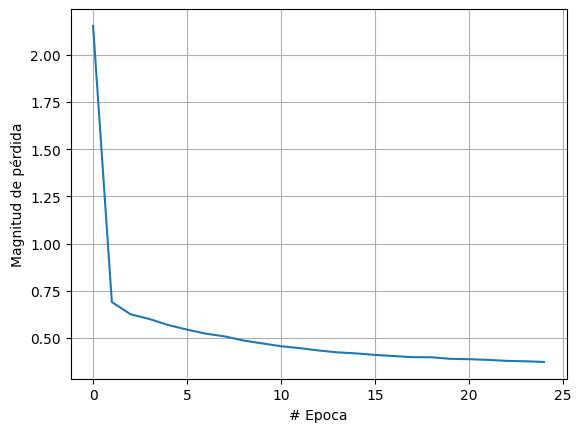

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

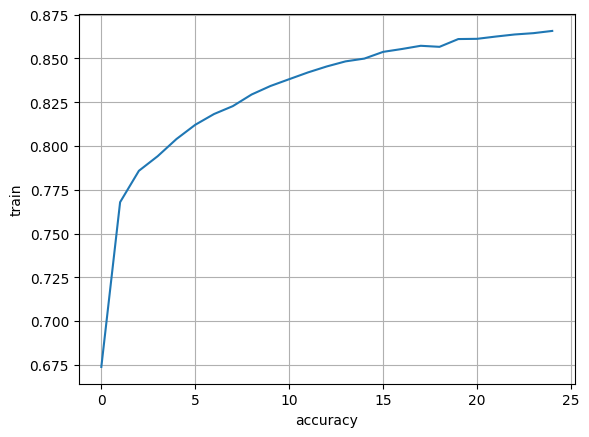

In [ ]:
plt.plot(historial.history["accuracy"], label="train")
plt.xlabel("accuracy")
plt.ylabel("train")
plt.grid()
plt.show()